In [1]:
import tensorflow as tf
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
import keras


path_train = "C:/Users/javie/Documents/Maestria/Materias/Topicos avanzados en Analitica/Proyecto 1/tropical/A Database of Leaf Images 2/A Database of Leaf Images"
train_folder_names = os.listdir(path_train)
train_folder_names.sort()
print(train_folder_names)

train_healthy_images = []
train_diseased_images = []
for Leaf_folder in train_folder_names:
  leaf_path = path_train + '/' + Leaf_folder
  healthy_images = os.listdir(leaf_path + '/healthy')
  train_healthy_images += [leaf_path + '/healthy/' + image for image in healthy_images]

  leaf_path = path_train + '/' + Leaf_folder
  diseased_images = os.listdir(leaf_path + '/diseased')
  train_diseased_images += [leaf_path + '/diseased/' + image for image in diseased_images]

train_images = train_healthy_images + train_diseased_images
train_labels = np.concatenate((np.zeros(len(train_healthy_images),dtype=str),np.ones(len(train_diseased_images),dtype=str)), axis=None)
train = zip(train_images,train_labels)
train_df = pd.DataFrame(train,columns=['path_image','class'])
print(train_df.head)


['Alstonia Scholaris (P2)', 'Arjun (P1)', 'Chinar (P11)', 'Gauva (P3)', 'Jamun (P5)', 'Jatropha (P6)', 'Lemon (P10)', 'Mango (P0)', 'Pomegranate (P9)', 'Pongamia Pinnata (P7)']
<bound method NDFrame.head of                                              path_image class
0     C:/Users/javie/Documents/Maestria/Materias/Top...      
1     C:/Users/javie/Documents/Maestria/Materias/Top...      
2     C:/Users/javie/Documents/Maestria/Materias/Top...      
3     C:/Users/javie/Documents/Maestria/Materias/Top...      
4     C:/Users/javie/Documents/Maestria/Materias/Top...      
...                                                 ...   ...
3807  C:/Users/javie/Documents/Maestria/Materias/Top...     1
3808  C:/Users/javie/Documents/Maestria/Materias/Top...     1
3809  C:/Users/javie/Documents/Maestria/Materias/Top...     1
3810  C:/Users/javie/Documents/Maestria/Materias/Top...     1
3811  C:/Users/javie/Documents/Maestria/Materias/Top...     1

[3812 rows x 2 columns]>


In [3]:
train_leaf_images, validation_leaf_images = train_test_split(train_df, test_size=0.2,random_state=42)

print(train_leaf_images)
print(validation_leaf_images)

                                             path_image class
1228  C:/Users/javie/Documents/Maestria/Materias/Top...      
1233  C:/Users/javie/Documents/Maestria/Materias/Top...      
1488  C:/Users/javie/Documents/Maestria/Materias/Top...      
3095  C:/Users/javie/Documents/Maestria/Materias/Top...     1
1675  C:/Users/javie/Documents/Maestria/Materias/Top...      
...                                                 ...   ...
1130  C:/Users/javie/Documents/Maestria/Materias/Top...      
1294  C:/Users/javie/Documents/Maestria/Materias/Top...      
860   C:/Users/javie/Documents/Maestria/Materias/Top...      
3507  C:/Users/javie/Documents/Maestria/Materias/Top...     1
3174  C:/Users/javie/Documents/Maestria/Materias/Top...     1

[3049 rows x 2 columns]
                                             path_image class
2979  C:/Users/javie/Documents/Maestria/Materias/Top...     1
2522  C:/Users/javie/Documents/Maestria/Materias/Top...     1
599   C:/Users/javie/Documents/Maestria/Mater

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
        train_leaf_images,
        directory=None,
        x_col='path_image',
        y_col='class',
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_dataframe(
        validation_leaf_images,
        directory=None,
        x_col='path_image',
        y_col='class',
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

Found 3049 validated image filenames belonging to 2 classes.
Found 763 validated image filenames belonging to 2 classes.


In [5]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 99, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 46, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 23, 64)       0

In [6]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [7]:
history = model.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20


c:\Users\javie\anaconda3\envs\myenv\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


96/96 [==============================] - 253s 3s/step - loss: 0.6493 - binary_accuracy: 0.6041 - val_loss: 0.5697 - val_binary_accuracy: 0.7195
Epoch 2/20
96/96 [==============================] - 240s 3s/step - loss: 0.5535 - binary_accuracy: 0.7212 - val_loss: 0.4895 - val_binary_accuracy: 0.7916
Epoch 3/20
96/96 [==============================] - 240s 3s/step - loss: 0.4276 - binary_accuracy: 0.8035 - val_loss: 0.3422 - val_binary_accuracy: 0.8598
Epoch 4/20
96/96 [==============================] - 245s 3s/step - loss: 0.3037 - binary_accuracy: 0.8777 - val_loss: 0.2731 - val_binary_accuracy: 0.8847
Epoch 5/20
96/96 [==============================] - 244s 3s/step - loss: 0.2063 - binary_accuracy: 0.9223 - val_loss: 0.2343 - val_binary_accuracy: 0.8991
Epoch 6/20
96/96 [==============================] - 252s 3s/step - loss: 0.1660 - binary_accuracy: 0.9337 - val_loss: 0.2197 - val_binary_accuracy: 0.9240
Epoch 7/20
96/96 [==============================] - 257s 3s/step - loss: 0.1352 -

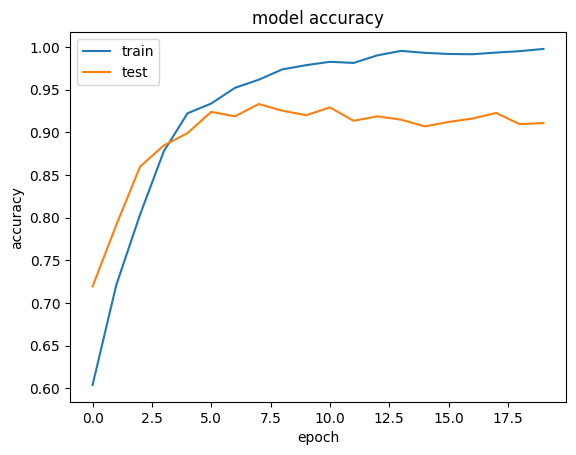

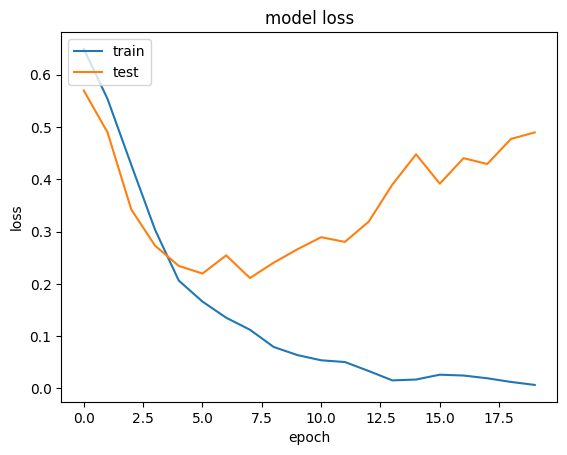

In [8]:
def graphingTrainingMetrics(history):
    plt.plot(history.history['binary_accuracy'])
    plt.plot(history.history['val_binary_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

graphingTrainingMetrics(history)

In [9]:
train_datagen = ImageDataGenerator( 
    rescale=1./255,
    zoom_range=0.2,
    rotation_range = 5,
    horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_dataframe(
        train_leaf_images,
        directory=None,
        x_col='path_image',
        y_col='class',
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

validation_generator = val_datagen.flow_from_dataframe(
        validation_leaf_images,
        directory=None,
        x_col='path_image',
        y_col='class',
        target_size=(300, 200),
        batch_size=32,
        class_mode='binary')

Found 3049 validated image filenames belonging to 2 classes.
Found 763 validated image filenames belonging to 2 classes.


In [10]:
model_dau = models.Sequential()

model_dau.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 200, 3)))
model_dau.add(layers.MaxPooling2D((2, 2)))
model_dau.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dau.add(layers.MaxPooling2D((2, 2)))
model_dau.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_dau.add(layers.MaxPooling2D((2, 2)))
model_dau.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_dau.add(layers.MaxPooling2D((2, 2)))

model_dau.add(layers.Flatten())
model_dau.add(layers.Dense(64, activation='relu'))
model_dau.add(layers.Dense(1, activation='sigmoid'))
model_dau.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 149, 99, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 73, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 71, 46, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 35, 23, 64)      

In [11]:
model_dau.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [12]:
history = model_dau.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20


c:\Users\javie\anaconda3\envs\myenv\lib\site-packages\keras\backend.py:5673: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


96/96 [==============================] - 264s 3s/step - loss: 0.6732 - binary_accuracy: 0.5763 - val_loss: 0.6175 - val_binary_accuracy: 0.6527
Epoch 2/20
96/96 [==============================] - 266s 3s/step - loss: 0.5546 - binary_accuracy: 0.7032 - val_loss: 0.4436 - val_binary_accuracy: 0.7837
Epoch 3/20
96/96 [==============================] - 265s 3s/step - loss: 0.4369 - binary_accuracy: 0.7908 - val_loss: 0.3371 - val_binary_accuracy: 0.8598
Epoch 4/20
96/96 [==============================] - 259s 3s/step - loss: 0.3521 - binary_accuracy: 0.8452 - val_loss: 0.3292 - val_binary_accuracy: 0.8611
Epoch 5/20
96/96 [==============================] - 263s 3s/step - loss: 0.2797 - binary_accuracy: 0.8891 - val_loss: 0.2245 - val_binary_accuracy: 0.9227
Epoch 6/20
96/96 [==============================] - 253s 3s/step - loss: 0.2360 - binary_accuracy: 0.9049 - val_loss: 0.1887 - val_binary_accuracy: 0.9318
Epoch 7/20
96/96 [==============================] - 262s 3s/step - loss: 0.2094 -

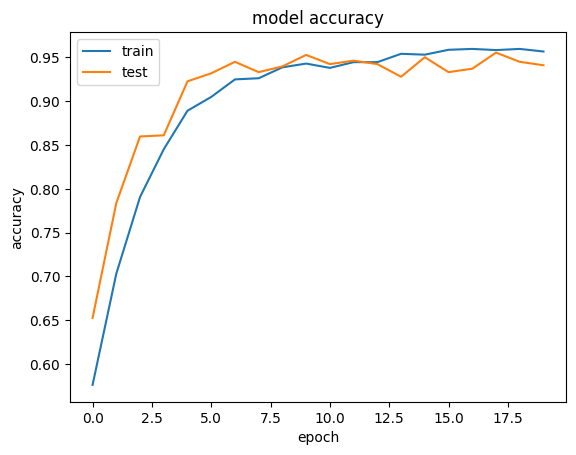

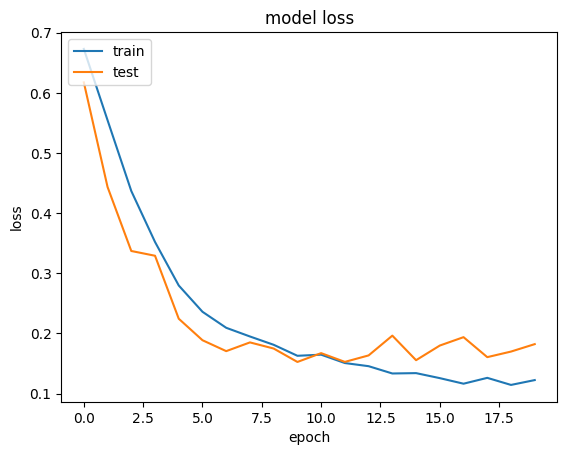

In [13]:
graphingTrainingMetrics(history)

In [14]:
model_reg_dp = models.Sequential()

model_reg_dp.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 200, 3)))
model_reg_dp.add(layers.MaxPooling2D((2, 2)))
model_reg_dp.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg_dp.add(layers.MaxPooling2D((2, 2)))
model_reg_dp.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_reg_dp.add(layers.MaxPooling2D((2, 2)))
model_reg_dp.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_reg_dp.add(layers.MaxPooling2D((2, 2)))


model_reg_dp.add(layers.Flatten())
model_reg_dp.add(layers.Dense(512, activation='relu'))
model_reg_dp.add(layers.Dropout(0.2))
model_reg_dp.add(layers.Dense(64, activation='relu'))
model_reg_dp.add(layers.Dropout(0.5))
model_reg_dp.add(layers.Dense(1, activation='sigmoid'))
model_reg_dp.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 149, 99, 32)      0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 73, 48, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 71, 46, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 35, 23, 128)     

In [15]:
model_reg_dp.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [16]:
history = model_reg_dp.fit(
      train_generator,
      epochs=20,
      validation_data=validation_generator)

Epoch 1/20
96/96 [==============================] - 269s 3s/step - loss: 0.6888 - binary_accuracy: 0.5428 - val_loss: 0.6241 - val_binary_accuracy: 0.7012
Epoch 2/20
96/96 [==============================] - 256s 3s/step - loss: 0.6260 - binary_accuracy: 0.6609 - val_loss: 0.5085 - val_binary_accuracy: 0.7444
Epoch 3/20
96/96 [==============================] - 257s 3s/step - loss: 0.4659 - binary_accuracy: 0.7757 - val_loss: 0.3401 - val_binary_accuracy: 0.8283
Epoch 4/20
96/96 [==============================] - 267s 3s/step - loss: 0.3262 - binary_accuracy: 0.8649 - val_loss: 0.2016 - val_binary_accuracy: 0.9305
Epoch 5/20
96/96 [==============================] - 268s 3s/step - loss: 0.2738 - binary_accuracy: 0.9013 - val_loss: 0.1950 - val_binary_accuracy: 0.9279
Epoch 6/20
96/96 [==============================] - 255s 3s/step - loss: 0.2267 - binary_accuracy: 0.9206 - val_loss: 0.1749 - val_binary_accuracy: 0.9423
Epoch 7/20
96/96 [==============================] - 254s 3s/step - los

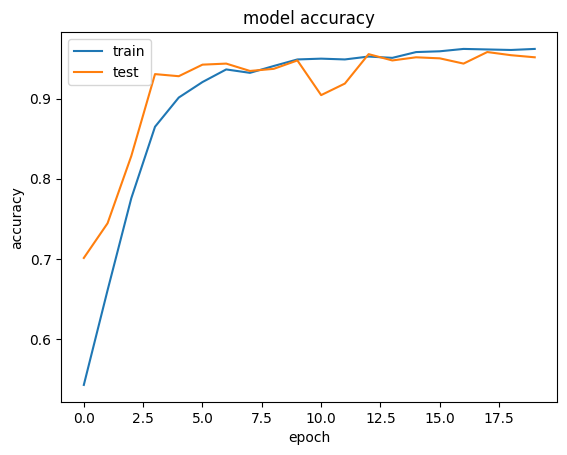

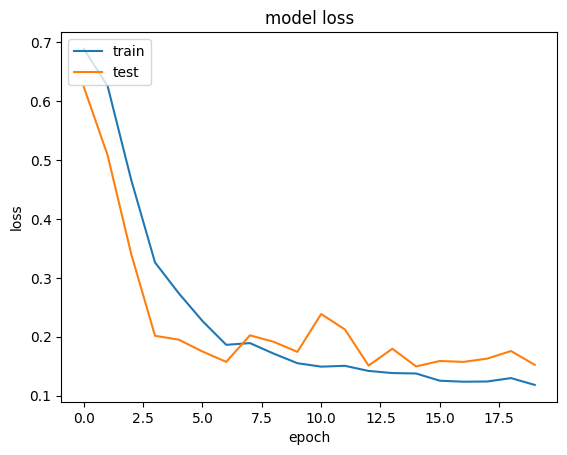

In [17]:
graphingTrainingMetrics(history)

In [18]:
model_reg_es = models.Sequential()

model_reg_es.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(300, 200, 3)))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))
model_reg_es.add(layers.Conv2D(128, (3, 3), activation='relu'))
model_reg_es.add(layers.MaxPooling2D((2, 2)))

model_reg_es.add(layers.Flatten())
model_reg_es.add(layers.Dense(64, activation='relu'))
model_reg_es.add(layers.Dropout(0.2))
model_reg_es.add(layers.Dense(1, activation='sigmoid'))
model_reg_es.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 298, 198, 32)      896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 149, 99, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 147, 97, 64)       18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 73, 48, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 71, 46, 64)        36928     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 35, 23, 64)      

In [19]:
model_reg_es.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])

In [20]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_binary_accuracy',  # Métrica a monitorear
                               patience=3,          # Número de épocas sin mejora
                               restore_best_weights=True)


In [21]:
history = model_reg_es.fit(
      train_generator,
      epochs=30,
      callbacks=[early_stopping],
      validation_data=validation_generator)

Epoch 1/30
96/96 [==============================] - 255s 3s/step - loss: 0.6848 - binary_accuracy: 0.5379 - val_loss: 0.6722 - val_binary_accuracy: 0.5072
Epoch 2/30
96/96 [==============================] - 253s 3s/step - loss: 0.6114 - binary_accuracy: 0.6828 - val_loss: 0.5292 - val_binary_accuracy: 0.7248
Epoch 3/30
96/96 [==============================] - 255s 3s/step - loss: 0.4887 - binary_accuracy: 0.7648 - val_loss: 0.4036 - val_binary_accuracy: 0.8427
Epoch 4/30
96/96 [==============================] - 256s 3s/step - loss: 0.3756 - binary_accuracy: 0.8370 - val_loss: 0.3185 - val_binary_accuracy: 0.8860
Epoch 5/30
96/96 [==============================] - 265s 3s/step - loss: 0.2979 - binary_accuracy: 0.8859 - val_loss: 0.2299 - val_binary_accuracy: 0.9227
Epoch 6/30
96/96 [==============================] - 268s 3s/step - loss: 0.2327 - binary_accuracy: 0.9118 - val_loss: 0.1889 - val_binary_accuracy: 0.9358
Epoch 7/30
96/96 [==============================] - 264s 3s/step - los

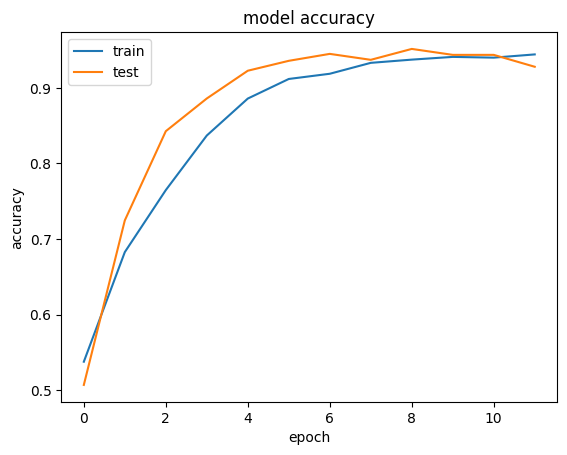

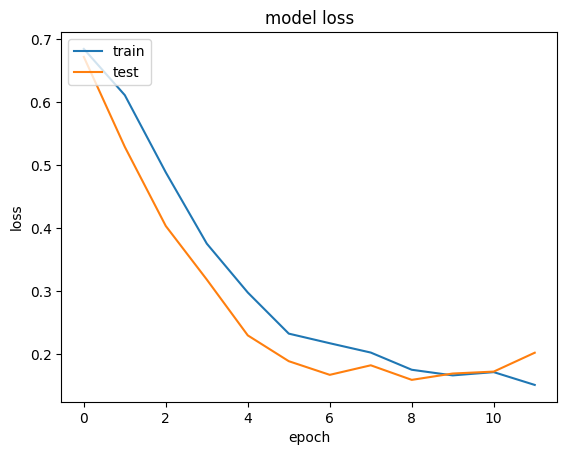

In [22]:
graphingTrainingMetrics(history)

In [23]:
from tensorflow.keras.preprocessing import image
def getPredicts(model,dataset):
    predictions = []
    for img_path in dataset['path_image']:
        img = image.load_img(img_path, target_size=(300, 200))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = img_array/255
        prediction = model.predict(img_array)
        predictions.append(prediction[0][0])
    
    return predictions

predictions = getPredicts(model=model,dataset=train_df)
predictions_dau = getPredicts(model=model_dau,dataset=train_df)
predictions_reg_dp = getPredicts(model=model_reg_dp,dataset=train_df)
predictions_reg_es= getPredicts(model=model_reg_es,dataset=train_df)


1/1 [==============================] - 0s 21ms/step


In [24]:
labels = list(map(lambda label: 1 if label == '1' else 0,train_df['class']))
predictions = list(map(lambda prediction: round(prediction),predictions))
predictions_dau = list(map(lambda prediction: round(prediction),predictions_dau))
predictions_reg_dp = list(map(lambda prediction: round(prediction),predictions_reg_dp))
predictions_reg_es = list(map(lambda prediction: round(prediction),predictions_reg_es)) 

In [28]:
matrixConfusion_model1 = tf.math.confusion_matrix(labels=labels,predictions=predictions)
matrixConfusion_model2 = tf.math.confusion_matrix(labels=labels,predictions=predictions_dau)
matrixConfusion_model3 = tf.math.confusion_matrix(labels=labels,predictions=predictions_reg_dp)
matrixConfusion_model4 = tf.math.confusion_matrix(labels=labels,predictions=predictions_reg_es)
print(matrixConfusion_model1)
print(matrixConfusion_model2)
print(matrixConfusion_model3)
print(matrixConfusion_model4)

tf.Tensor(
[[1872   32]
 [  36 1872]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1860   44]
 [ 121 1787]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1844   60]
 [  64 1844]], shape=(2, 2), dtype=int32)
tf.Tensor(
[[1832   72]
 [ 103 1805]], shape=(2, 2), dtype=int32)


In [26]:
from sklearn.metrics import accuracy_score, classification_report

print(accuracy_score(y_true=labels, y_pred=predictions))
print(accuracy_score(y_true=labels, y_pred=predictions_dau))
print(accuracy_score(y_true=labels, y_pred=predictions_reg_dp))
print(accuracy_score(y_true=labels, y_pred=predictions_reg_es))


print(classification_report(y_true=labels, y_pred=predictions))
print(classification_report(y_true=labels, y_pred=predictions_dau))
print(classification_report(y_true=labels, y_pred=predictions_reg_dp))
print(classification_report(y_true=labels, y_pred=predictions_reg_es))


0.9821615949632738
0.9567156348373557
0.9674711437565582
0.9540923399790137
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1904
           1       0.98      0.98      0.98      1908

    accuracy                           0.98      3812
   macro avg       0.98      0.98      0.98      3812
weighted avg       0.98      0.98      0.98      3812

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1904
           1       0.98      0.94      0.96      1908

    accuracy                           0.96      3812
   macro avg       0.96      0.96      0.96      3812
weighted avg       0.96      0.96      0.96      3812

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1904
           1       0.97      0.97      0.97      1908

    accuracy                           0.97      3812
   macro avg       0.97      0.97      0.97      381

In [27]:
model.save_weights(filepath='./model_original')
model_dau.save_weights(filepath='./model_data_Augmentation')
model_reg_dp.save_weights(filepath='./model_droupout')
model_reg_es.save_weights(filepath='./model_early_stopping')